# Data Filter

The Sentinel NDVI time series data have an unexpected amount of outliers that have to be manually removed before being used as input to the models, for this we will perform some experiments on the data. The first part consists of the implementation of the Local Outlier Factor (an unsupervised outlier identifier), while the second part is the implementation of the Savitzky-Golay and Locally Weighted Scatterplot Smoothing polynomial filters.

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import utils
import numpy as np
import pathlib
import operator
import os
from statsmodels.nonparametric.smoothers_lowess import lowess

from typing import Union, List, Tuple
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.signal import savgol_filter

In [17]:
# TODO: Changes these values for parameters on a database.
BASE_DIR = '/home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/DataExtraction/manitoba19Data'
bands =  ['B4','B3','B2','B8']

# Dict of the images.
images = utils.load_landsat_image(BASE_DIR, bands)

Opening file /home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/DataExtraction/manitoba19Data/S-HARMONIZED_20190720T172909_20190720T173623_T14UNV_20Jul2019_B4.tif
Opening file /home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/DataExtraction/manitoba19Data/S-HARMONIZED_20190720T172909_20190720T173623_T14UNV_20Jul2019_B3.tif
Opening file /home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/DataExtraction/manitoba19Data/S-HARMONIZED_20190720T172909_20190720T173623_T14UNV_20Jul2019_B2.tif
Opening file /home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/DataExtraction/manitoba19Data/S-HARMONIZED_20190720T172909_20190720T173623_T14UNV_20Jul2019_B8.tif
Opening file /home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/DataExtraction/manitoba19Data/S-HARMONIZED_20190511T172909_20190511T173225_T14UNV_11May2019_B4.tif
Opening file /home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/DataExtraction/mani

In [18]:
days, dates = utils.dates_to_day_numbers(images.keys())

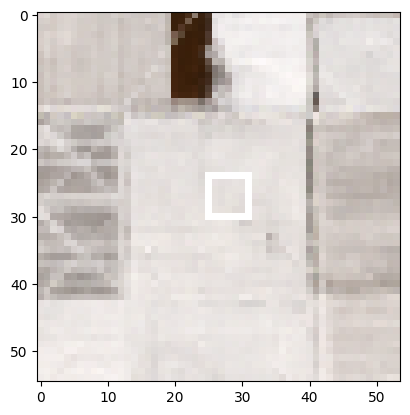

In [19]:
ndvi_series = utils.generate_ndvi_time_series(images)

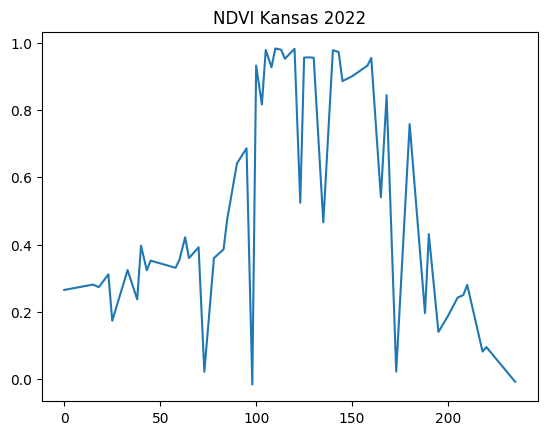

In [20]:
plt.plot(days, ndvi_series)
plt.title('NDVI Kansas 2022')
plt.show()

In [21]:
x, y = utils.preprocess_data(days, ndvi_series)

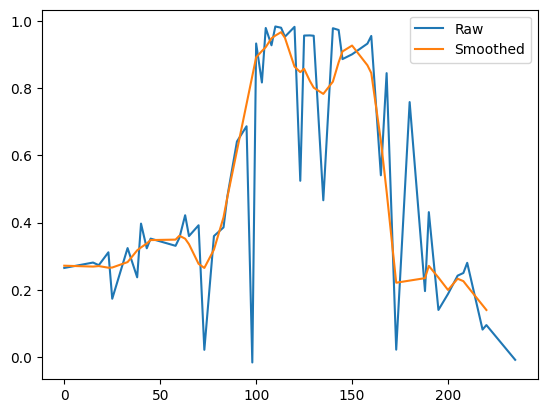

In [22]:
# plot data
plt.plot(days, ndvi_series, label='Raw')
plt.plot(x, y, label='Smoothed')
plt.legend()
plt.show()